In [226]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.tree import export_graphviz 
from io import StringIO 
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, confusion_matrix, classification_report, make_scorer
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}
def models_evaluation(X, y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''

In [227]:
df = pd.DataFrame(load_breast_cancer()['data'],columns=load_breast_cancer()['feature_names'])
df['y'] = load_breast_cancer()['target']
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [228]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

Decision Tree Classifier

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [230]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
y_train_pred = dtc.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Accuracy: 1.0


In [231]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9415204678362573


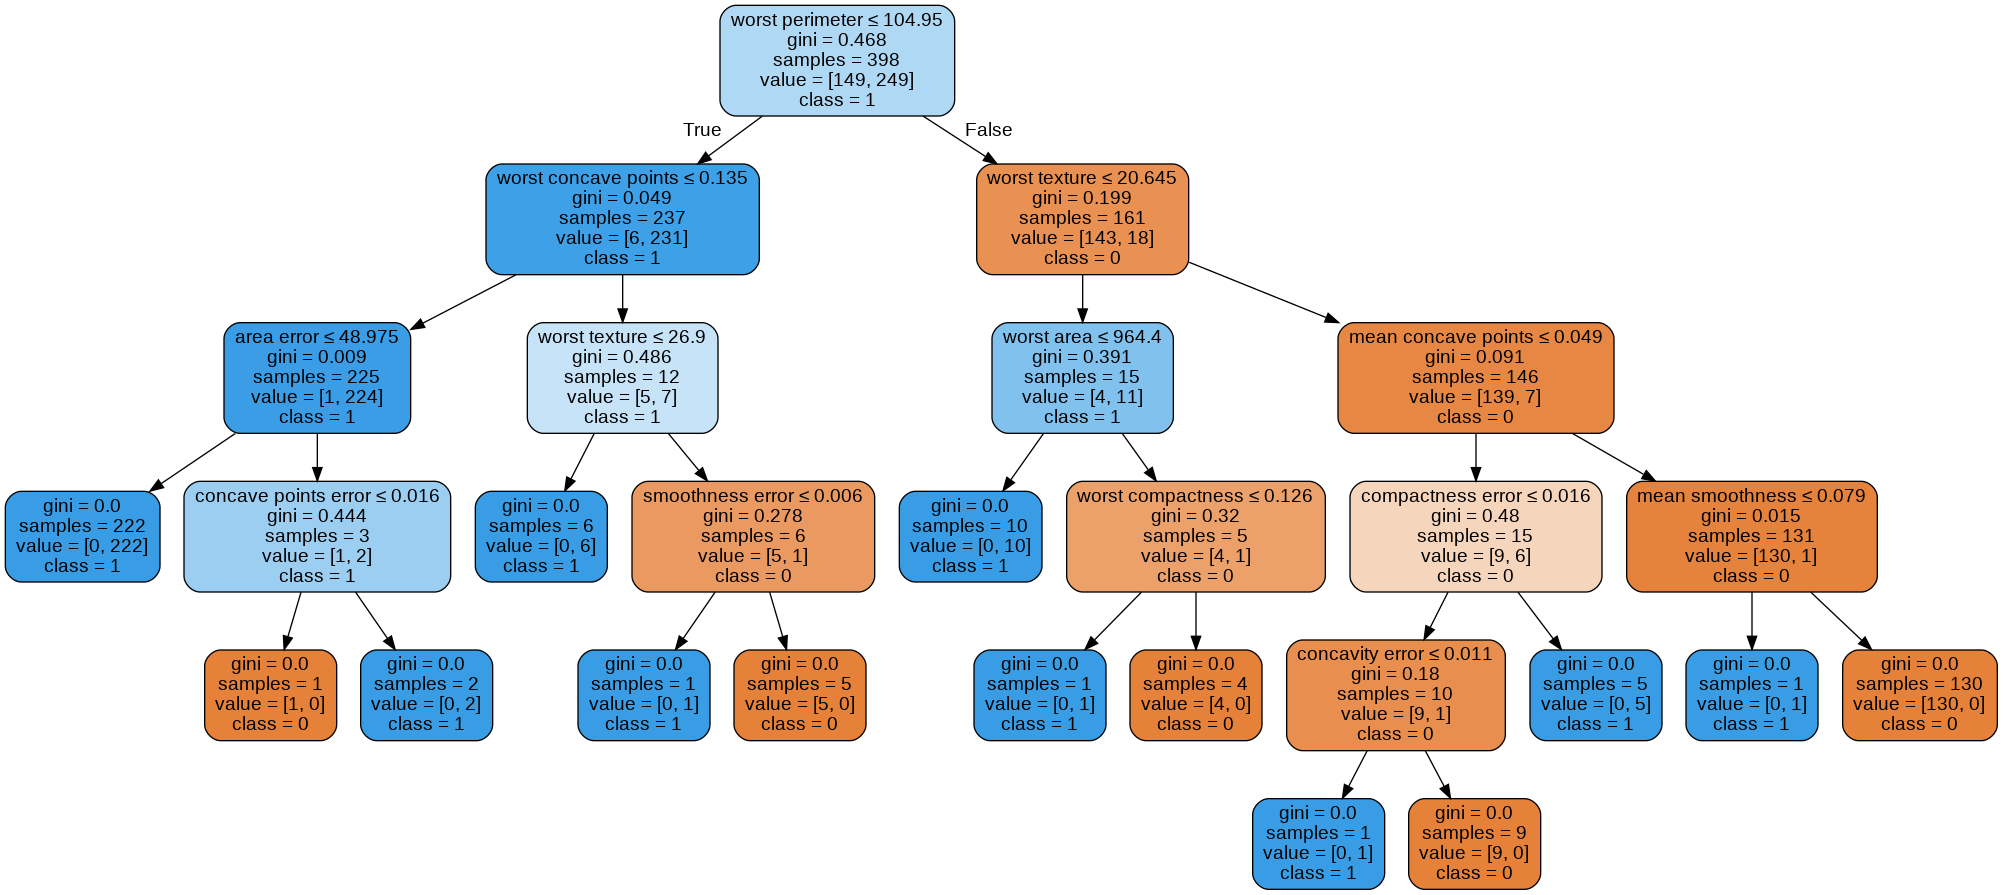

In [232]:
dot_data = StringIO()
export_graphviz(dtc,out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = X.columns, class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('breastcancer1.png')
Image(graph.create_png())

In [233]:
h = {"criterion":["gini","entropy"],"max_depth":[10, 20, 50, 100],"min_samples_leaf":[10, 20, 50]}
dtc = GridSearchCV(DecisionTreeClassifier(),h)
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8654970760233918


In [234]:
y_train_pred = dtc.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Accuracy: 0.957286432160804


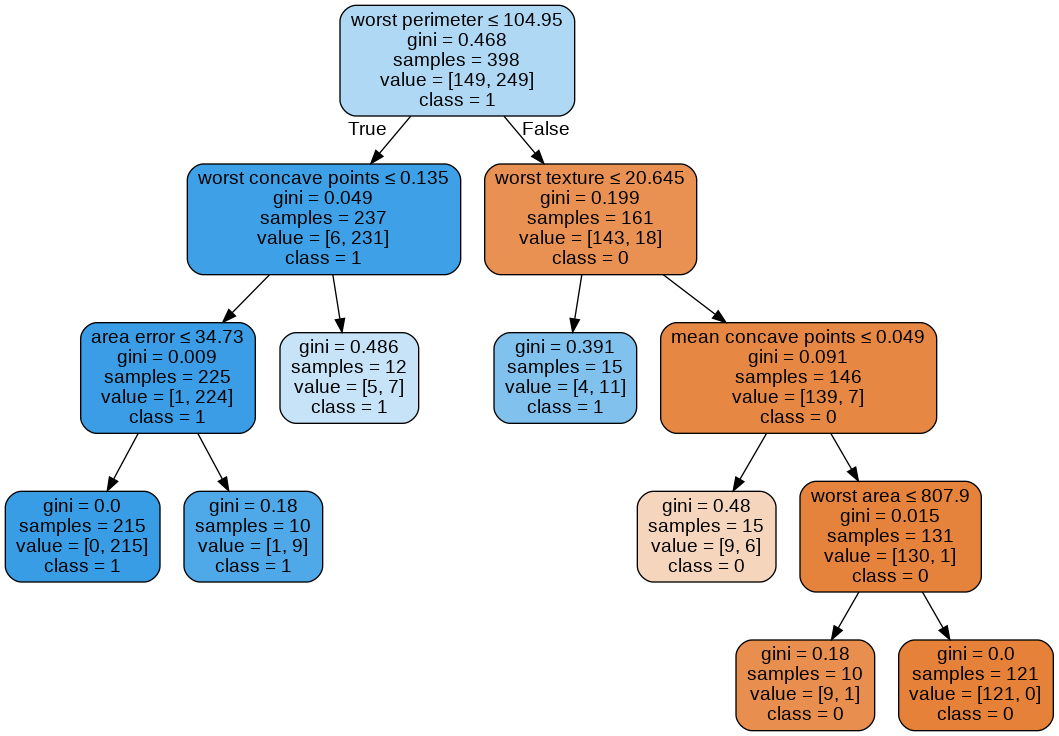

In [235]:
dot_data = StringIO()
export_graphviz(dtc.best_estimator_,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=x.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('breastcancer1.png')
Image(graph.create_png())

Random Forest Classifier

In [236]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = 999)

In [237]:
rfc = RandomForestClassifier(random_state=0, warm_start = True)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print("confustion matrix on validation data: \n" + str(confusion_matrix(y_test, y_pred)))

0.9777777777777777
0.9887640449438202
0.979454926624738
confustion matrix on validation data: 
[[52  1]
 [ 2 88]]


In [238]:
positive_weight = sum(y_train == 0)/sum(y_train == 1)
rfc = RandomForestClassifier(random_state=0,class_weight={0:1,1:positive_weight},warm_start = True)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 0.5955056179775281},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=True)

In [239]:
y_pred = rfc.predict(X_test)
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print("\n confustion matrix on validation data: \n" + str(confusion_matrix(y_test, y_pred)))

0.9888888888888889
0.978021978021978
0.9755765199161426

 confustion matrix on validation data: 
[[51  2]
 [ 1 89]]


In [240]:
def scoring(ground_truth, predictions):
    cm=confusion_matrix(ground_truth, predictions)
    fp = cm[0, 1]
    fn = cm[1, 0]
    return  fn*(1/63)+fp*(2/108)

In [241]:
loss_score=make_scorer(scoring, greater_is_better = False)

In [242]:
rtc = GridSearchCV(RandomForestClassifier(random_state = 0, warm_start = True),h,scoring = loss_score)
rtc.fit(X_train, y_train)
y_pred = rtc.predict(X_test)
print(recall_score(y_test, y_pred))     
print(precision_score(y_test, y_pred))  
print(roc_auc_score(y_test, y_pred))    
print("\n confustion matrix on validation data: \n" + str(confusion_matrix(y_test, y_pred)))

0.9888888888888889
0.978021978021978
0.9755765199161426

 confustion matrix on validation data: 
[[51  2]
 [ 1 89]]


Gradient Boosting Method Classification

In [243]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = 999)

In [244]:
gbc = GradientBoostingClassifier(learning_rate=0.1)
gbc.fit(X_train,y_train)
print(classification_report(y_test,gbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.98      0.98      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



Confusion Matrix : 
 [[51  2]
 [ 2 88]]
Accuracy Score is 0.9720
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.98      0.98      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

AUC-ROC: 0.970020964360587
LOGLOSS Value is 0.9661


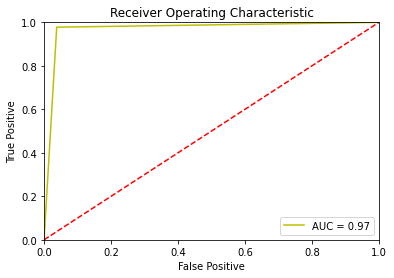

In [245]:
y_pred = gbc.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(y_test, y_pred)))
print ('Classification Report : \n', classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, y_pred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.show()

K-Nearest Neighbour

In [246]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = 2)  # k = 2
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9230769230769231


In [247]:
knc = KNeighborsClassifier(n_neighbors = 4)  # k = 4
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.951048951048951


In [248]:
knc = KNeighborsClassifier(n_neighbors = 6)  # k = 6
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.951048951048951


Comparison between Classifiers

In [249]:
classification_models = []
classification_models.append(('Decision Tree', DecisionTreeClassifier(criterion = "entropy")))
classification_models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion="entropy")))
classification_models.append(('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, criterion="entropy")))
classification_models.append(('K Nearest', KNeighborsClassifier(n_neighbors=100)))

In [250]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
for name, model in classification_models:
  kfold = KFold(n_splits=10, random_state=7)
  result = cross_val_score(model, X, y, cv=kfold, scoring = 'accuracy')
  print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Decision Tree: Mean Accuracy = 93.67% - SD Accuracy = 2.85%
Random Forest: Mean Accuracy = 96.14% - SD Accuracy = 2.58%
Gradient Boosting: Mean Accuracy = nan% - SD Accuracy = nan%
K Nearest: Mean Accuracy = 90.70% - SD Accuracy = 8.30%


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'entropy'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'entropy'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
K

In [251]:
#dtr_model = DecisionTreeClassifier()
#rfc_model = RandomForestClassifier()
#gbc_model = GradientBoostingClassifier()
#knc_model = KNeighborsClassifier()

In [252]:
#dtr = cross_validate(dtr_model, X, y, cv = 4, scoring = 'f1')
#rfc = cross_validate(rfc_model, X, y, cv = 4, scoring = 'f1')
#gbc = cross_validate(gbc_model, X, y, cv = 4, scoring = 'f1')
#knc = cross_validate(knc_model, X, y, cv = 4, scoring = 'f1')

In [253]:
#models_scores_table = pd.DataFrame({'Decision Tree':[dtr['test_score'].mean(), dtr['test_precision'].mean(), dtr['test_recall'].mean(), dtr['test_f1_score'].mean()], 'Random Forest':[rfc['test_score'].mean(), rfc['test_precision'].mean(), rfc['test_recall'].mean(), rfc['test_f1_score'].mean()], 'Gradient Boosting':[gbc['test_score'].mean(), gbc['test_precision'].mean(), gbc['test_recall'].mean(), gbc['test_f1_score'].mean()], 'K nearest':[knc['test_score'].mean(), knc['test_precision'].mean(), knc[test_recall].mean(), knc[test_f1_score].mean()]}, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])